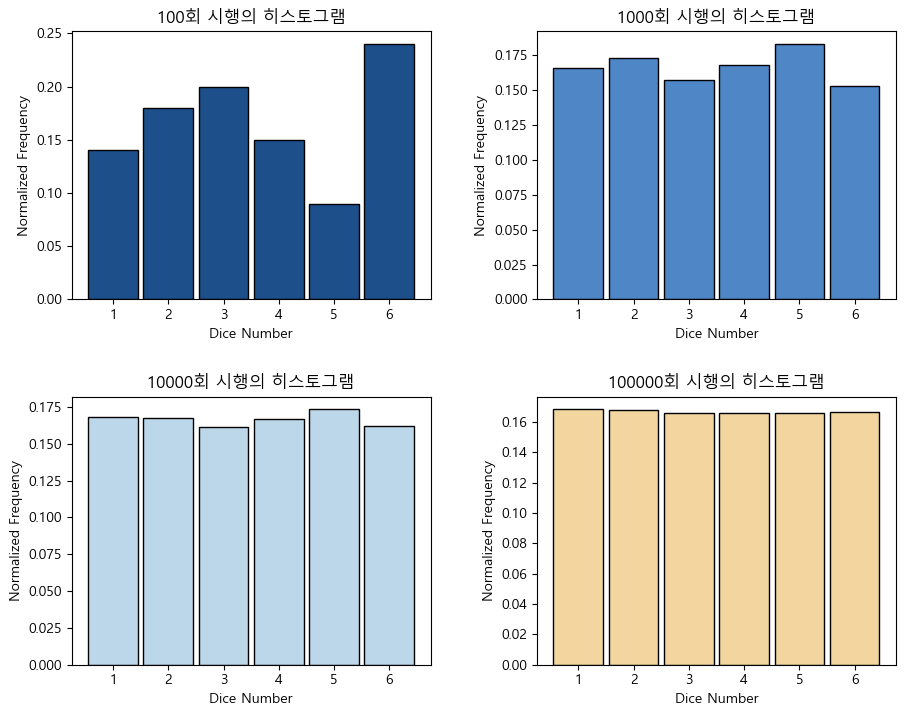

 주사위를 굴리는 것의 시행횟수가 100회 일때는 가장 적게 나온 숫자인 5가 나오는 경우가 가장 많이 나온 숫자인 6이 나오는 경우의
절반도 되지 않을 정도로 각 숫자가 나오는 경우의 수에 차이가 났으나 시행회수가 1000회 일때 부터는 각 숫자가 나오는 경우의 수가 
눈에 띄게 비슷해지고 시행횟수가 10000회일 때는 더욱 각 숫자가 나오는 경우의 수가 비슷해졌고 마지막으로 100000회가 되었을 때는
각 숫자가 나오는 경우의 수가 눈으로 비교하기 힘들정도로 비슷해졌다.
 또한 y축의 단위를 보아도 정규화된 빈도수가 시행횟수가 100회 일때는 최저 0,10이하 부터 최대 0.20 이상을 표현해야 해서 y축의 
눈금의 범위가 0부터 0.25로 가장 컸지만 시행횟수가 1000회일때와 시행횟수가 10000회 일때는 y축의 눈금의 범위가 0부터 0.175로  
줄어들더니 시행횟수가 100000회 일때는 y축의 눈금의 범위가 0부터 0.16으로 가장 작아진 것을 통해서도 각 숫자가 나오는 경우의
수가 비슷해졌음을 알 수 있다.


In [79]:
import csv
import random
import matplotlib.pyplot as plt
nums = [100, 1000, 10000, 100000] #시행횟수를 저장하는 배열

def main():
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus']=False #한국어 깨짐 방지용 코드
#     for num in nums:
#         savedata(num)
#q2에 계속해서 자료가 추가되는 것을 막기 위한 코드, 평가때는 기존의 q2파일을 삭제하고 주석을 해제하고 실행시키시면 됩니다.
    visualization()
    
    #분석결과 출력
    print(""" 주사위를 굴리는 것의 시행횟수가 100회 일때는 가장 적게 나온 숫자인 5가 나오는 경우가 가장 많이 나온 숫자인 6이 나오는 경우의
절반도 되지 않을 정도로 각 숫자가 나오는 경우의 수에 차이가 났으나 시행회수가 1000회 일때 부터는 각 숫자가 나오는 경우의 수가 
눈에 띄게 비슷해지고 시행횟수가 10000회일 때는 더욱 각 숫자가 나오는 경우의 수가 비슷해졌고 마지막으로 100000회가 되었을 때는
각 숫자가 나오는 경우의 수가 눈으로 비교하기 힘들정도로 비슷해졌다.
 또한 y축의 단위를 보아도 정규화된 빈도수가 시행횟수가 100회 일때는 최저 0,10이하 부터 최대 0.20 이상을 표현해야 해서 y축의 
눈금의 범위가 0부터 0.25로 가장 컸지만 시행횟수가 1000회일때와 시행횟수가 10000회 일때는 y축의 눈금의 범위가 0부터 0.175로  
줄어들더니 시행횟수가 100000회 일때는 y축의 눈금의 범위가 0부터 0.16으로 가장 작아진 것을 통해서도 각 숫자가 나오는 경우의
수가 비슷해졌음을 알 수 있다.""")
    
def savedata(n): #난수를 생성해 csv파일에 저장하는 함수
    result = [] #난수 생성 수행의 결과를 저장할 배열
    for i in range(n):
        result.append(random.randrange(1,7)) #1부터 6까지의 난수를 생성해서 result배열에 저장
        
    with open('q2.csv','a',newline='') as f:
        writer = csv.writer(f)
        writer.writerow(result)

def visualization(): #csv파일에 저장된 데이터를 읽어와 시각화하는 함수
    i=0 #반복문에서 출력 내용을 변경할 목적으로 사용할 변수
    color = ['#1d4f8b','#4e86c6','#bdd7ea','#f3d5a0'] #그래프의 색깔 저장용 배열
    
    f = open('q2.csv', 'r', encoding='ansi')
    data = csv.reader(f)
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
    #2x2서브플롯을 만들고 그곳에 히스토그램을 그려 한 줄에 2개의 히스토그램이 출력되게 함
    fig.tight_layout(pad=5.0)
    #히스토그램 간의 간격 조절
    
    for row in data:
        row = [int(x) for x in row] #읽어온 자료를 int형으로 변환하지 않으면 x축에 1부터 6까지가 순서대로 정렬안됨
        ax = axs[i // 2][i % 2]
        ax.set_title(str(nums[i]) + "회 시행의 히스토그램")
        ax.set_xlabel('Dice Number') #x축은 주사위의 1~6까지의 눈을 의미
        ax.set_ylabel('Normalized Frequency') #y축은 1~6까지의 숫자가 나온 횟수를 정규화하여 표시
        ax.hist(row, bins=6, range=(1, 7), color=color[i], edgecolor='black', rwidth=0.9, density=True, align='left')
        #나오는 경우의 1부터 6까지이므로 x축을 6등분 함 
        #각 시행에대한 히스토그램마다 색깔을 다르게 해서 다른 그래프임을 쉽게 알아차릴수 있게함
        #1부터 6까지의 숫자에 대한 결과의 구분을 쉽게하기 위해서 막대에 검은색 테두리를 추가함
        #1부터 6까지의 숫자에 대한 결과의 구분을 쉽게하기 위해서 막대의 너비값을 조정해 막대 사이에 간격을 만듦
        #시행횟수가 변화하므로 쉬운 비교를 위해 y축을 정규화해서 단위를 통일함
        #x축 눈금이 각 막대의 중앙에 위치하게 하기 위해 align사용
        i += 1
    plt.show()

if __name__ == "__main__":
    main()